<a href="https://colab.research.google.com/github/frendev/BT-re/blob/master/BDA_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Global_Superstore.xlsx to Global_Superstore.xlsx


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Putting the data from CSV file to dataFrame
df = pd.read_excel('Global_Superstore.xlsx')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [7]:
df.shape

(51290, 24)

In [8]:
#We can see that the data has 51290 data entries with 24 features.

In [9]:
df.describe()
# can see that there is negetive trend in profit
# the discount falls in the range of 25% - 100%

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [11]:
# Let's understand how many of them are categorical and how many unique values each categorical columns have,

In [12]:
cat_cols = df.select_dtypes(exclude=['int64','float64']).columns
cat_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

# Customer Analysis

**1. Profile the customers based on their frequency of purchase - Calculate frequency of purchase for each customer and plot a histogram to get the threshold for Low /Mid /High frequency customers.**

In [51]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
year                  4
dtype: int64

In [52]:
df_customer = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']]
df_customer.count()

Customer ID    51290
Order ID       51290
Order Date     51290
Ship Date      51290
Ship Mode      51290
Country        51290
dtype: int64

In [53]:
# After dropping the duplicate entries
df_customer1 = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']].drop_duplicates()
df_customer1.count()

Customer ID    25754
Order ID       25754
Order Date     25754
Ship Date      25754
Ship Mode      25754
Country        25754
dtype: int64

In [54]:
df_customer1.head()

,Customer ID,Order ID,Order Date,Ship Date,Ship Mode,Country
0,RH-19495,CA-2012-124891,31-07-2012,31-07-2012,Same Day,United States
1,JR-16210,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Australia
2,CR-12730,IN-2013-71249,17-10-2013,18-10-2013,First Class,Australia
3,KM-16375,ES-2013-1579342,28-01-2013,30-01-2013,First Class,Germany
4,RH-9495,SG-2013-4320,05-11-2013,06-11-2013,Same Day,Senegal


In [55]:
df_customer1['Customer ID'].nunique()

1590

In [56]:
def new_features(x):
    d = []
    d.append(x['Order ID'].nunique())
    d.append(x['Sales'].sum())
    d.append(x['Shipping Cost'].sum())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['City'].nunique())
    return pd.Series(d, index=['Purchases','Total_Sales','Total_Cost','First_Purchase_Date','Latest_Purchase_Date','Location_Count'])

df_customer_new = df.groupby('Customer ID').apply(new_features)

In [57]:
df_customer_new.columns

Index(['Purchases', 'Total_Sales', 'Total_Cost', 'First_Purchase_Date',
       'Latest_Purchase_Date', 'Location_Count'],
      dtype='object')

In [58]:
from datetime import datetime
df_customer_new['Duration'] = (df_customer_new['Latest_Purchase_Date'] - df_customer_new['First_Purchase_Date']).dt.days


In [59]:
df_customer_new['Frequency'] = df_customer_new['Duration']/df_customer_new['Purchases']
df_customer_new['Frequency'].head()

Customer ID
AA-10315     71.736842
AA-10375     58.434783
AA-10480     66.650000
AA-10645     39.527778
AA-315      177.285714
Name: Frequency, dtype: float64

In [60]:
df_customer_new.head()

,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency
Customer ID,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,71.736842
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,58.434783
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,66.650000
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,39.527778
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,177.285714


In [61]:
df_customer_new['Frequency'].describe()

count    1590.000000
mean      111.303339
std        80.489358
min         0.000000
25%        50.669643
50%        73.055728
75%       155.083333
max       655.500000
Name: Frequency, dtype: float64

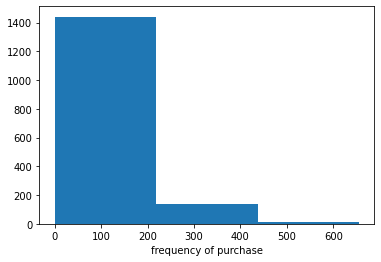

In [62]:
# 1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for
# each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

plt.hist(df_customer_new['Frequency'], bins=3)
plt.xlabel('frequency of purchase')
plt.show()

In [63]:
# bucketing continuous data
def freq(x):
    if x < 219:
        return 'Low' 
    elif x < 436:
        return 'Mid' 
    else:
        return 'High'

df_customer_new['freq_range'] = df_customer_new.Frequency.apply(freq)

df_customer_new['freq_range'].value_counts()

Low     1442
Mid      138
High      10
Name: freq_range, dtype: int64

In [64]:
# profiling based on purchase frequency
df_customer_new.head()


,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency,freq_range
Customer ID,,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,71.736842,Low
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,58.434783,Low
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,66.650000,Low
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,39.527778,Low
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,177.285714,Low


**2. Are the high frequent customers contributing more revenue ?**

In [66]:
result = df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)

In [67]:
df_customer_new['Revenue'] = df_customer_new['Purchases'] *  df_customer_new['Total_Sales']

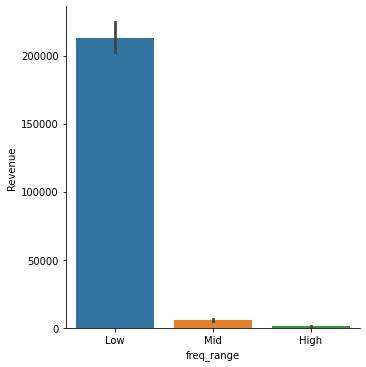

In [68]:
sns.catplot(x="freq_range", y="Revenue", kind="bar", data=df_customer_new);

In [69]:
# From the graph it is evident that the high frequent customers and mid frequent customers are contributing less. While Low frequent customers are contributing more.

**3. Are they also profitable - what is the profit margin across the buckets ?**

In [70]:
profit_margin = df_customer_new.groupby('freq_range')

In [71]:
profit_margin.describe()

Purchases             ...        Revenue              
               count       mean  ...            75%           max
freq_range                       ...                             
High            10.0   2.400000  ...    1109.310750  3.144660e+03
Low           1442.0  17.459778  ...  364536.356505  1.071477e+06
Mid            138.0   4.000000  ...    7610.430000  2.755179e+04

[3 rows x 56 columns]

**4. Which customer segment is most profitable in each year(there is a column called customer segment)**

In [72]:
df.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

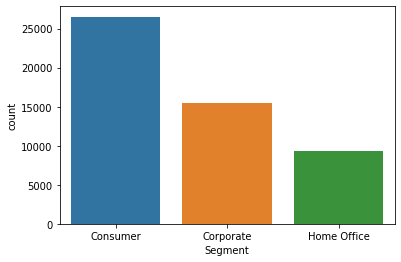

In [73]:
sns.countplot(x="Segment",data = df)

In [74]:
df_x = df
df_x['year'] = pd.DatetimeIndex(df['Order Date']).year
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013


<Figure size 1728x1080 with 0 Axes>

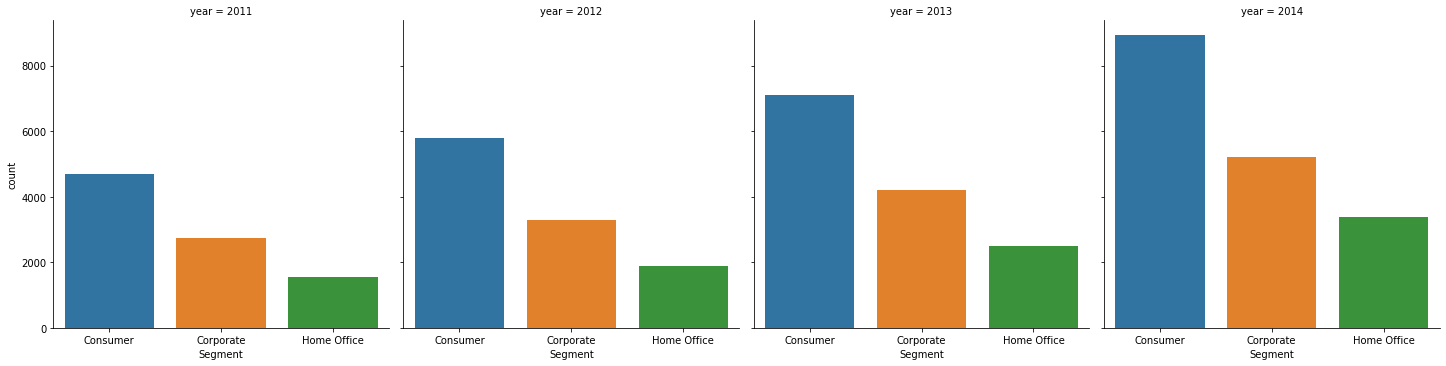

In [75]:
plt.figure(figsize=(24,15))
sns.catplot(x="Segment", col="year", data=df_x, kind="count")
plt.show()

**5. How the customers are distributed across the countries?- Let's draw a pie chart**

In [76]:
customer_country = pd.DataFrame({'Count' : df.groupby(["Country"]).size()}).reset_index().sort_values('Count',ascending = False).head(10)

In [77]:
customer_country

,Country,Count
139,United States,9994
6,Australia,2837
44,France,2827
81,Mexico,2644
47,Germany,2065
26,China,1880
138,United Kingdom,1633
17,Brazil,1599
57,India,1555
58,Indonesia,1390


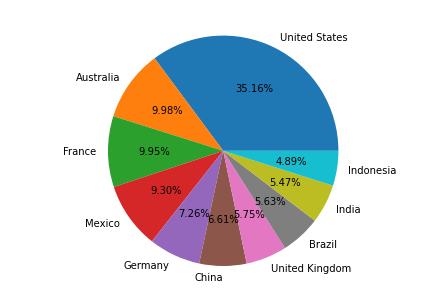

In [78]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Countries = customer_country['Country']
cust_count = customer_country['Count']
ax.pie(cust_count, labels = Countries,autopct='%1.2f%%')
plt.show()

# Product Analysis

**1. Plotting the countries with their total sales - bar plot**

Text(0.5, 0, 'Countries')

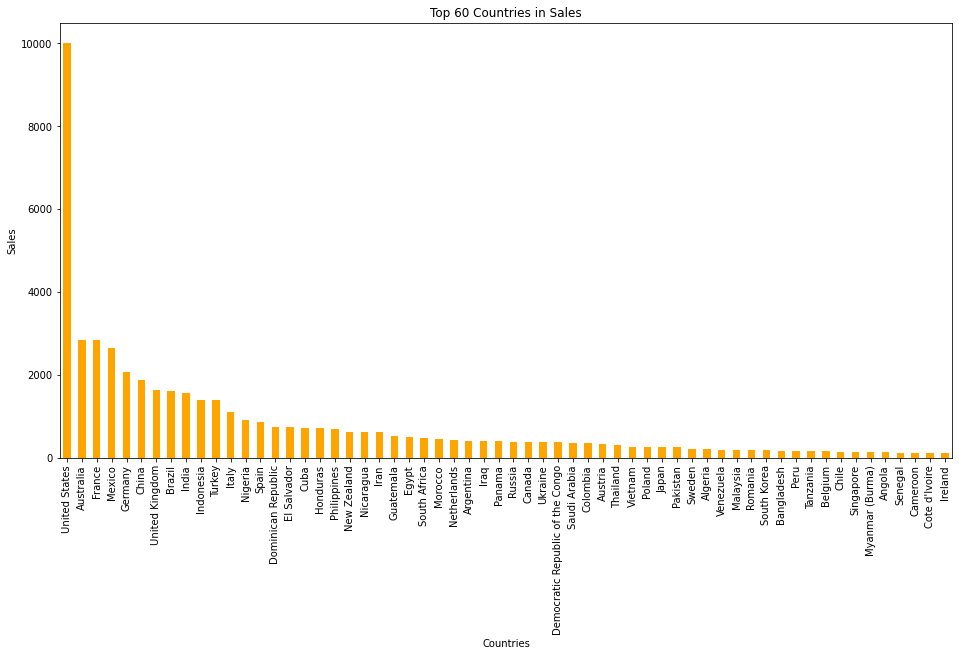

In [79]:
plt.figure(figsize=(16,8))
countries = df.groupby('Country')['Sales'].count().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='orange')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Sales')
plt.xlabel('Countries')

**2. What are top 5 profit making product types on a yearly basis ?**

In [80]:
products = df.groupby('Product Name')['Profit'].count().sort_values(ascending=False)
# top_5_products = products[:5]
# top_5_products
products.head()

Product Name
Staples                           227
Cardinal Index Tab, Clear          92
Eldon File Cart, Single Width      90
Rogers File Cart, Single Width     84
Ibico Index Tab, Clear             83
Name: Profit, dtype: int64

In [81]:

df_x['Order_to_Ship_Days'] = (pd.to_datetime(df_x['Ship Date']) 
                                           - pd.to_datetime(df_x['Order Date'])).dt.days

# # df_customer1.head()
#days_taken = df_x.groupby('Order ID')['Order_to_Ship_Days'].mean()
# total_days = days_taken.to_frame()
# total_days.head()

In [82]:
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,Order_to_Ship_Days
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,0
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,61
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,1
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,2
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,31


Text(0.5, 0, 'Countries')

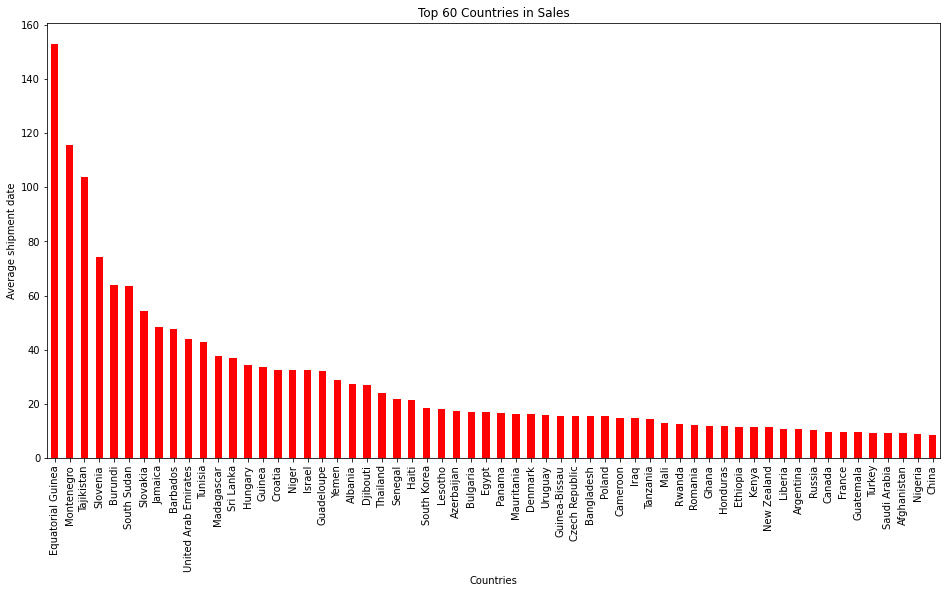

In [83]:
plt.figure(figsize=(16,8))
countries = df_x.groupby('Country')['Order_to_Ship_Days'].mean().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='red')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Average shipment date')
plt.xlabel('Countries')